# FINAL PROJECT - KELOMPOK 1 SMARTHPATH DATA ANALYST BOOTCAMP



*   Muhammad Farrel Danendra Rachim
*   Afra Mahendra Prasetyawati
*   Reska Mulyasari
*   Syahdatunisa Fidela Rahman



Link kaggle: https://www.kaggle.com/datasets/lovishbansal123/sales-of-a-supermarket/data

# Import Library dan Upload Dataset

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns

In [ ]:
# code ini untuk menghilangkan warning message saat kita menjalankan code-code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
supermarket_data = pd.read_csv('/content/supermarket_sales.csv')

# Eksplorasi Data Awal

In [ ]:
#Cek dimensi dataframe supermarket
print(f"Baris: {supermarket_data.shape[0]}")
print(f"Kolom: {supermarket_data.shape[1]}")

Baris: 1000
Kolom: 17


In [ ]:
#cek detail informasi dataframe supermarket
supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# Lihat preview data untuk 10 baris
supermarket_data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


## Banyak Nilai Kolom Kategori

In [ ]:
supermarket_data['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [ ]:
supermarket_data['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [ ]:
supermarket_data['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [ ]:
supermarket_data['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [ ]:
supermarket_data['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

## Grouping Kolom-Kolom Tertentu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lakukan grouping untuk branch supercenter dan kota supercenter
supermarket_data.groupby(['Branch', 'City']).size().sort_index()

Branch  City     
A       Yangon       340
B       Mandalay     332
C       Naypyitaw    328
dtype: int64

Ternyata, setiap superbranch A, B, C mewakilkan branch untuk setiap kota Yangon Mandalay, atau Naypyitaw.

In [ ]:
# Lakukan grouping untuk branch supercenter, product line, dan metode pembayaran
supermarket_data.groupby(['Branch', 'Product line', 'Payment']).size()

Branch  Product line            Payment    
A       Electronic accessories  Cash           18
                                Credit card    21
                                Ewallet        21
        Fashion accessories     Cash           13
                                Credit card    17
                                Ewallet        21
        Food and beverages      Cash           18
                                Credit card    21
                                Ewallet        19
        Health and beauty       Cash           17
                                Credit card    14
                                Ewallet        16
        Home and lifestyle      Cash           24
                                Credit card    15
                                Ewallet        26
        Sports and travel       Cash           20
                                Credit card    16
                                Ewallet        23
B       Electronic accessories  Cash           24
      

In [ ]:
# Lakukan grouping untuk branch supercenter, product line
supermarket_data.groupby(['Branch', 'Product line']).size()

Branch  Product line          
A       Electronic accessories    60
        Fashion accessories       51
        Food and beverages        58
        Health and beauty         47
        Home and lifestyle        65
        Sports and travel         59
B       Electronic accessories    55
        Fashion accessories       62
        Food and beverages        50
        Health and beauty         53
        Home and lifestyle        50
        Sports and travel         62
C       Electronic accessories    55
        Fashion accessories       65
        Food and beverages        66
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
dtype: int64

In [ ]:
# Lakukan grouping untuk branch supercenter, payment
supermarket_data.groupby(['Branch', 'Payment']).size()

Branch  Payment    
A       Cash           110
        Credit card    104
        Ewallet        126
B       Cash           110
        Credit card    109
        Ewallet        113
C       Cash           124
        Credit card     98
        Ewallet        106
dtype: int64

# Handling Missing Value

In [ ]:
# Cek missing value
supermarket_data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#Cek persentase missing value pada setiap kolom
(supermarket_data.isna().sum() / supermarket_data.shape[0]) * 100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

Jadi, tidak ada missing value pada seluruh dataset.

# Duplicate Data



In [ ]:
#Cek banyak baris yang terduplikat
supermarket_data.duplicated().sum()

0

Jadi, tidak ada baris duplikat pada data ini.

# Data Typos

In [ ]:
supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#Cek data typos disetiap kolom
typoDF2 = supermarket_data.select_dtypes(include=['object']).columns
for col in typoDF2:
  print(col)
  print(pd.DataFrame(supermarket_data[col].unique()))

Invoice ID
               0
0    750-67-8428
1    226-31-3081
2    631-41-3108
3    123-19-1176
4    373-73-7910
..           ...
995  233-67-5758
996  303-96-2227
997  727-02-1313
998  347-56-2442
999  849-09-3807

[1000 rows x 1 columns]
Branch
   0
0  A
1  C
2  B
City
           0
0     Yangon
1  Naypyitaw
2   Mandalay
Customer type
        0
0  Member
1  Normal
Gender
        0
0  Female
1    Male
Product line
                        0
0       Health and beauty
1  Electronic accessories
2      Home and lifestyle
3       Sports and travel
4      Food and beverages
5     Fashion accessories
Date
            0
0    1/5/2019
1    3/8/2019
2    3/3/2019
3   1/27/2019
4    2/8/2019
..        ...
84  2/26/2019
85  3/17/2019
86  3/14/2019
87   2/4/2019
88  2/19/2019

[89 rows x 1 columns]
Time
         0
0    13:08
1    10:29
2    13:23
3    20:33
4    10:37
..     ...
501  16:27
502  15:23
503  18:18
504  15:17
505  19:12

[506 rows x 1 columns]
Payment
             0
0      Ewallet
1    

Dari hasil di atas, untuk setiap kolom bertipe "Objek" tidak ada typo dari nilai-nilai unik data

# Check Outliers

In [ ]:
supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

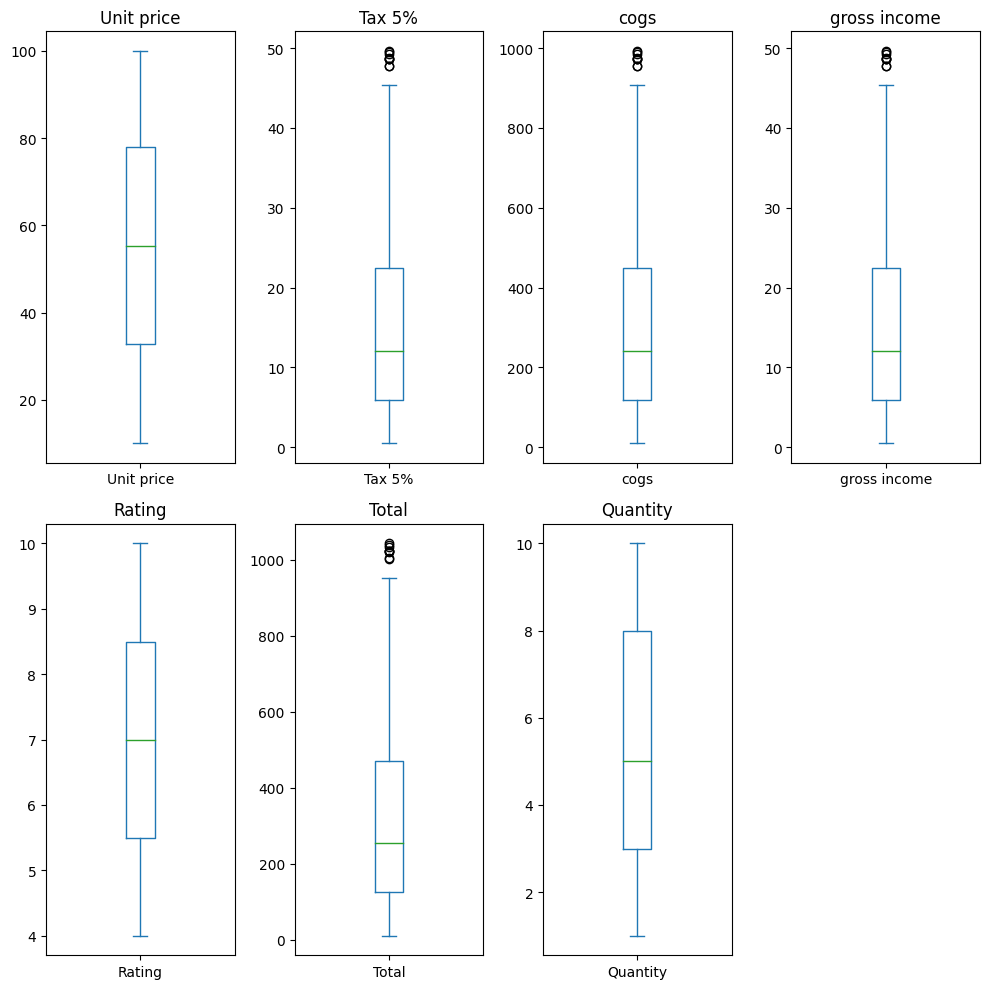

In [ ]:
# Define the columns to plot
ratio_data = ['Unit price', 'Tax 5%', 'cogs', 'gross income', 'Rating', 'Total', 'Quantity']

# Create the figure and axes with the exact number of required subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns to plot
for i, data in enumerate(ratio_data):
    # Create a boxplot in the corresponding subplot
    supermarket_data[data].plot(kind='box', ax=axes[i])
    axes[i].set_title(data)

# Hide the unused subplot
axes[len(ratio_data)].set_visible(False)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


Dari boxplot di atas, untuk kolom-kolom numerik ada beberapa outlier seperti gross income, tax 5%, total, dan cogs. Kita lihat lebih jelas banyak outlier tiap kolom dengan fungsi berikut.

In [ ]:
# membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(supermarket_data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(supermarket_data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(supermarket_data[nama_kolom] >= (Q3 + 1.5 * IQR))
  elif batas == 'lower_bound':
      bound = np.where(supermarket_data[nama_kolom] <= (Q1 - 1.5 * IQR))
  return list(bound[0])

In [ ]:
# Jumlah outliers kolom cogs
upper_cogs = cek_outlier('cogs','upper_bound')
lower_cogs = cek_outlier('cogs','lower_bound')
print(f"Jumlah total outlier kolom cogs : {len(upper_cogs) + len(lower_cogs)}")
# Jumlah outliers kolom Rating
upper_Rating = cek_outlier('Rating','upper_bound')
lower_Rating = cek_outlier('Rating','lower_bound')
print(f"Jumlah total outlier kolom Rating : {len(upper_Rating) + len(lower_Rating)}")
# Jumlah outliers kolom Unit_price
upper_Unit_price = cek_outlier('Unit price','upper_bound')
lower_Unit_price = cek_outlier('Unit price','lower_bound')
print(f"Jumlah total outlier kolom Unit_price : {len(upper_Unit_price) + len(lower_Unit_price)}")
# Jumlah outliers kolom Quantity
upper_Quantity   = cek_outlier('Quantity','upper_bound')
lower_Quantity   = cek_outlier('Quantity','lower_bound')
print(f"Jumlah total outlier kolom Quantity : {len(upper_Quantity) + len(lower_Quantity)}")
# Jumlah outliers kolom  Tax 5%
upper_Tax   = cek_outlier('Tax 5%','upper_bound')
lower_Tax   = cek_outlier('Tax 5%','lower_bound')
print(f"Jumlah total outlier kolom Tax 5%   : {len(upper_Tax) + len(lower_Tax)}")
# Jumlah outliers kolom  gross income
upper_gross_income   = cek_outlier('gross income','upper_bound')
lower_gross_income   = cek_outlier('gross income','lower_bound')
print(f"Jumlah total outlier kolom gross income  : {len(upper_gross_income) + len(lower_gross_income)}")
# Jumlah outliers kolom  Total
upper_Total   = cek_outlier('Total','upper_bound')
lower_Total   = cek_outlier('Total','lower_bound')
print(f"Jumlah total outlier kolom Total   : {len(upper_Total) + len(lower_Total)}")

Jumlah total outlier kolom cogs : 9
Jumlah total outlier kolom Rating : 0
Jumlah total outlier kolom Unit_price : 0
Jumlah total outlier kolom Quantity : 0
Jumlah total outlier kolom Tax 5%   : 9
Jumlah total outlier kolom gross income  : 9
Jumlah total outlier kolom Total   : 9


# Handling Outliers (IQR)

Untuk meng-handle outlier, kita hilangkan data-data yang merupakan outlier dari fungsi sebelumnya.

In [ ]:
supermarket_data2 =supermarket_data.copy()

In [ ]:
# Buat fungsi untuk filtering outliers
def filter_outlier(supermarket_data2, nama_kolom):
    if nama_kolom == 'cogs':
        data_temp = supermarket_data2.loc[~supermarket_data2.index.isin(upper_cogs)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_cogs)]
        return data_temp
    if nama_kolom == 'Tax 5%':
        data_temp = supermarket_data2.loc[~supermarket_data2.index.isin(upper_Tax)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_Tax)]
        return data_temp
    if nama_kolom == 'Total':
        data_temp = supermarket_data2.loc[~supermarket_data2.index.isin(upper_Total)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_Total)]
        return data_temp
    if nama_kolom == 'gross income':
        data_temp = supermarket_data2.loc[~supermarket_data2.index.isin(upper_gross_income)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_gross_income)]
        return data_temp

In [ ]:
# Membersihkan outlier untuk kolom 'cogs'
supermarket_data2_cleaned = filter_outlier(supermarket_data2, 'cogs')

# Membersihkan outlier untuk kolom 'Tax 5%'
supermarket_data2_cleaned = filter_outlier(supermarket_data2_cleaned, 'Tax 5%')

# Membersihkan outlier untuk kolom 'Total'
supermarket_data2_cleaned = filter_outlier(supermarket_data2_cleaned, 'Total')

# Membersihkan outlier untuk kolom 'gross Income'
supermarket_data2_cleaned = filter_outlier(supermarket_data2_cleaned, 'gross income')

In [ ]:
supermarket_data2_cleaned.reset_index(drop=True, inplace=True)
supermarket_data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               991 non-null    object 
 1   Branch                   991 non-null    object 
 2   City                     991 non-null    object 
 3   Customer type            991 non-null    object 
 4   Gender                   991 non-null    object 
 5   Product line             991 non-null    object 
 6   Unit price               991 non-null    float64
 7   Quantity                 991 non-null    int64  
 8   Tax 5%                   991 non-null    float64
 9   Total                    991 non-null    float64
 10  Date                     991 non-null    object 
 11  Time                     991 non-null    object 
 12  Payment                  991 non-null    object 
 13  cogs                     991 non-null    float64
 14  gross margin percentage  9

# Pengubahan Tipe Data Date dan Time menjadi DateTime

In [ ]:
supermarket_data2_cleaned[['Date', 'Time']].head(5)

,Date,Time
0,1/5/2019,13:08
1,3/8/2019,10:29
2,3/3/2019,13:23
3,1/27/2019,20:33
4,2/8/2019,10:37


In [ ]:
supermarket_data2_cleaned['Date'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [ ]:
# Gunakan fungsi pd.to_datetime untuk mengubah tipe kolom menjadi datetime.
supermarket_data2_cleaned['Date'] = pd.to_datetime(supermarket_data2_cleaned['Date'], format="%m/%d/%Y")

In [ ]:
supermarket_data2_cleaned['Date'].apply(type).unique()

array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object)

In [ ]:
supermarket_data2_cleaned['Time'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [ ]:
# Gunakan fungsi pd.to_datetime untuk mengubah tipe kolom menjadi datetime.
supermarket_data2_cleaned['Time'] = pd.to_datetime(supermarket_data2_cleaned['Time'], format="%H:%M").dt.time

In [ ]:
supermarket_data2_cleaned['Time'].apply(type).unique()

array([<class 'datetime.time'>], dtype=object)

In [ ]:
supermarket_data2_cleaned[['Date', 'Time']].head(5)

,Date,Time
0,2019-01-05,13:08:00
1,2019-03-08,10:29:00
2,2019-03-03,13:23:00
3,2019-01-27,20:33:00
4,2019-02-08,10:37:00


In [ ]:
supermarket_data2_cleaned.to_csv('cleaned_supermarket_sales.csv', index=False)

Encoding Data Kategorikal

In [ ]:

supermarket_data2_cleaned['Customer type'].replace(['Member', 'Normal'],
                        [1,0], inplace=True)
supermarket_data2_cleaned

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,1,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,0,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,0,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,1,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,0,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,652-49-6720,C,Naypyitaw,1,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40:00,Ewallet,60.95,4.761905,3.0475,5.9
987,233-67-5758,C,Naypyitaw,0,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
988,727-02-1313,A,Yangon,1,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
989,347-56-2442,A,Yangon,0,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
supermarket_data2_cleaned['Branch'].replace(['A', 'B','C'],
                        [1,2,3], inplace=True)
supermarket_data2_cleaned

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,Yangon,1,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,3,Naypyitaw,0,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,Yangon,0,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,Yangon,1,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,Yangon,0,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,652-49-6720,3,Naypyitaw,1,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40:00,Ewallet,60.95,4.761905,3.0475,5.9
987,233-67-5758,3,Naypyitaw,0,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
988,727-02-1313,1,Yangon,1,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
989,347-56-2442,1,Yangon,0,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
supermarket_data2_cleaned['Gender'].replace(['Female', 'Male'],
                        [0,1], inplace=True)
supermarket_data2_cleaned

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,Yangon,1,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,3,Naypyitaw,0,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,Yangon,0,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,Yangon,1,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,Yangon,0,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,652-49-6720,3,Naypyitaw,1,0,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40:00,Ewallet,60.95,4.761905,3.0475,5.9
987,233-67-5758,3,Naypyitaw,0,1,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
988,727-02-1313,1,Yangon,1,1,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
989,347-56-2442,1,Yangon,0,1,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
supermarket_data2_cleaned['Payment'].replace(['Ewallet', 'Cash', 'Credit card'],
                        [1,2,3], inplace=True)
supermarket_data2_cleaned

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,1,Yangon,1,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,1,522.83,4.761905,26.1415,9.1
1,226-31-3081,3,Naypyitaw,0,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,2,76.40,4.761905,3.8200,9.6
2,631-41-3108,1,Yangon,0,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,3,324.31,4.761905,16.2155,7.4
3,123-19-1176,1,Yangon,1,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,1,465.76,4.761905,23.2880,8.4
4,373-73-7910,1,Yangon,0,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,1,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,652-49-6720,3,Naypyitaw,1,0,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40:00,1,60.95,4.761905,3.0475,5.9
987,233-67-5758,3,Naypyitaw,0,1,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,1,40.35,4.761905,2.0175,6.2
988,727-02-1313,1,Yangon,1,1,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,2,31.84,4.761905,1.5920,7.7
989,347-56-2442,1,Yangon,0,1,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,2,65.82,4.761905,3.2910,4.1


Korelasi


In [ ]:
supermarket_data2_cleaned = supermarket_data2_cleaned.apply(pd.to_numeric, errors='coerce')


correlation_matrix = supermarket_data2_cleaned.corr()


correlation_with_customer_type = correlation_matrix['gross income'].sort_values(ascending=False)


print(correlation_with_customer_type)

cogs                       1.000000
Total                      1.000000
Tax 5%                     1.000000
gross income               1.000000
Quantity                   0.699290
Unit price                 0.623355
Customer type              0.029361
Branch                     0.024253
Payment                    0.004259
Date                      -0.007583
Rating                    -0.026092
Gender                    -0.042631
Invoice ID                      NaN
City                            NaN
Product line                    NaN
Time                            NaN
gross margin percentage         NaN
Name: gross income, dtype: float64


In [ ]:
#drop kolom yang tidak berkorelasi dan berkorelasi negatif
supermarket_data2_cleaned_train = supermarket_data2_cleaned.drop(['Invoice ID','City','Product line', 'Date', 'Time', 'gross margin percentage', 'Total', 'Gender', 'Customer type', 'Branch', 'Payment', 'Tax 5%', 'cogs'],axis = 1)

In [ ]:
supermarket_data2_cleaned_train

,Unit price,Quantity,gross income,Rating
0,74.69,7,26.1415,9.1
1,15.28,5,3.8200,9.6
2,46.33,7,16.2155,7.4
3,58.22,8,23.2880,8.4
4,86.31,7,30.2085,5.3
...,...,...,...,...
986,60.95,1,3.0475,5.9
987,40.35,1,2.0175,6.2
988,31.84,1,1.5920,7.7
989,65.82,1,3.2910,4.1


# Training: Machine Learning

Support Vector Regression (Kernel : Poly)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR

In [ ]:
X = supermarket_data2_cleaned_train.drop(['gross income'], axis=1)
y = supermarket_data2_cleaned_train['gross income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = SVR(kernel='poly', degree=3)

model.fit(X, y)

y_test_pred = model.predict(X_test)

# Mengukur kinerja model
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 5.987662067781319
Mean Absolute Error: 1.9605679519061672


In [ ]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# Menguji skor R^2
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training R^2 Score: {train_r2}')
print(f'Test R^2 Score: {test_r2}')

if train_r2 < 0.5:
    print("Model underfit.")
elif train_r2 - test_r2 > 0.1:
    print("Model overfit.")
else:
    print("Model sudah digeneralisasi dengan baik.")


Training R^2 Score: 0.9594979422224622
Test R^2 Score: 0.956280868125039
Model sudah digeneralisasi dengan baik.


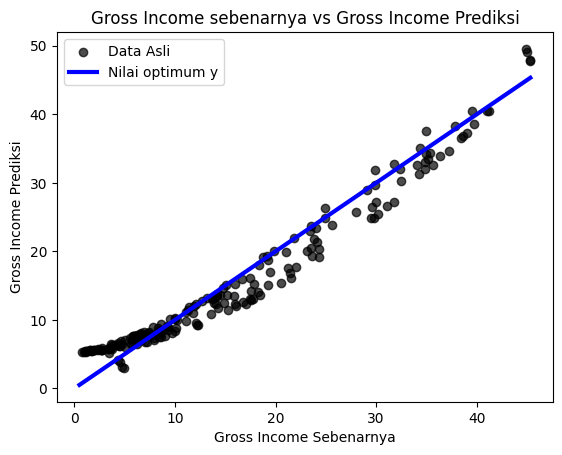

In [ ]:
# Step 9 : visualization result
plt.scatter(y_test, y_test_pred, color='black', alpha=0.7, label='Data Asli')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linewidth=3, label='Nilai optimum y')
plt.xlabel('Gross Income Sebenarnya')
plt.ylabel('Gross Income Prediksi')
plt.title('Gross Income sebenarnya vs Gross Income Prediksi')
plt.legend()
plt.show()

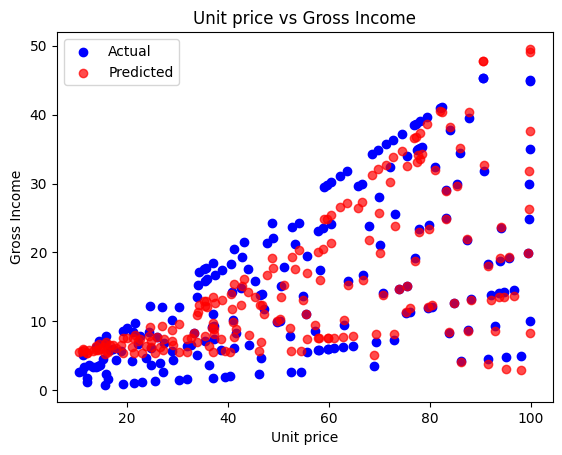

In [ ]:
plt.scatter(X_test['Unit price'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Unit price'], y_test_pred, color='red', alpha=0.7, label='Predicted')
plt.xlabel('Unit price')
plt.ylabel('Gross Income')
plt.title('Unit price vs Gross Income')
plt.legend()
plt.show()